# Exploratory Data Analysis (EDA) Overview

Understanding Polymarket Trader Behavior Through API-Generated Data

This project performs an exploratory analysis of ~1000 Polymarket traders, using data pulled from the Hashdive Smart Scores API.
The goal is to understand the behavioral patterns, risk profiles, and market-specific tendencies of traders across different categories (politics, crypto, sports, world events, etc.).

The EDA serves as the foundation for the statistical analysis performed later in the project.
All figures and insights are generated programmatically from the API responses using dedicated Python scripts.

## Data Collection & Preprocessing

### Step 1: Fetching Smart Score Pages (31-99)
First, I had to download all the "leaderboard" pages for traders with Smart Scores ranging from 31 to 99. The Hashdive platform organizes traders into pages based on their scores, so I wrote a script to systematically fetch each page and save them locally.

### Step 2: Extracting User Addresses
Once I had all the leaderboard pages, I combined them and extracted the unique user addresses (wallet addresses) of all ~1000 traders. This gave me a list of traders to fetch detailed data for.

### Step 3: Downloading Individual User Profiles
This was the most time-consuming part. I had to download detailed trading data for each of the 1000 users individually and save them to `data/users/`. 

**The technical challenges:**
- **Rate limiting**: The API was heavily rate-limited
- **Total time**: The entire data collection took approximately **20 hours** to complete
- **WebSocket complexity**: The API used WebSocket connections rather than simple HTTP requests
- **Protocol buffers**: The responses were encrypted using Protocol Buffers (protobuf), so I had to decrypt them using specialized libraries before I could parse the JSON data

### Step 4: Merging Into Final Dataset
After collecting all individual JSON files, I wrote a parser (`eda/json_to_csv_converter.py`) to:
1. Read all the individual user JSON files from `data/users/`
2. Extract and flatten the nested data structures
3. Combine everything into a single clean CSV file: `data/users_data.csv`

This final CSV contains 60+ features per trader, including performance metrics, trading behavior, category preferences, and trader type classifications.

In [3]:
# Load the data
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the processed dataset
df = pd.read_csv('data/users_data.csv')

print(f"Dataset loaded successfully!")
print(f"Total traders: {len(df)}")
print(f"Total features: {df.shape[1]}")
print(f"\nFirst few columns: {list(df.columns[:10])}")


Dataset loaded successfully!
Total traders: 938
Total features: 63

First few columns: ['user_address', 'total_positions', 'current_balance', 'rank_1d_place', 'rank_1d_amount', 'smart_score', 'total_pnl', 'traded_usd_volume_last_30d_sum', 'active_bets_amount', 'finished_bets_amount']


## Performance Distribution Analysis

Let's start by examining the overall performance metrics of traders: win rates and smart scores.


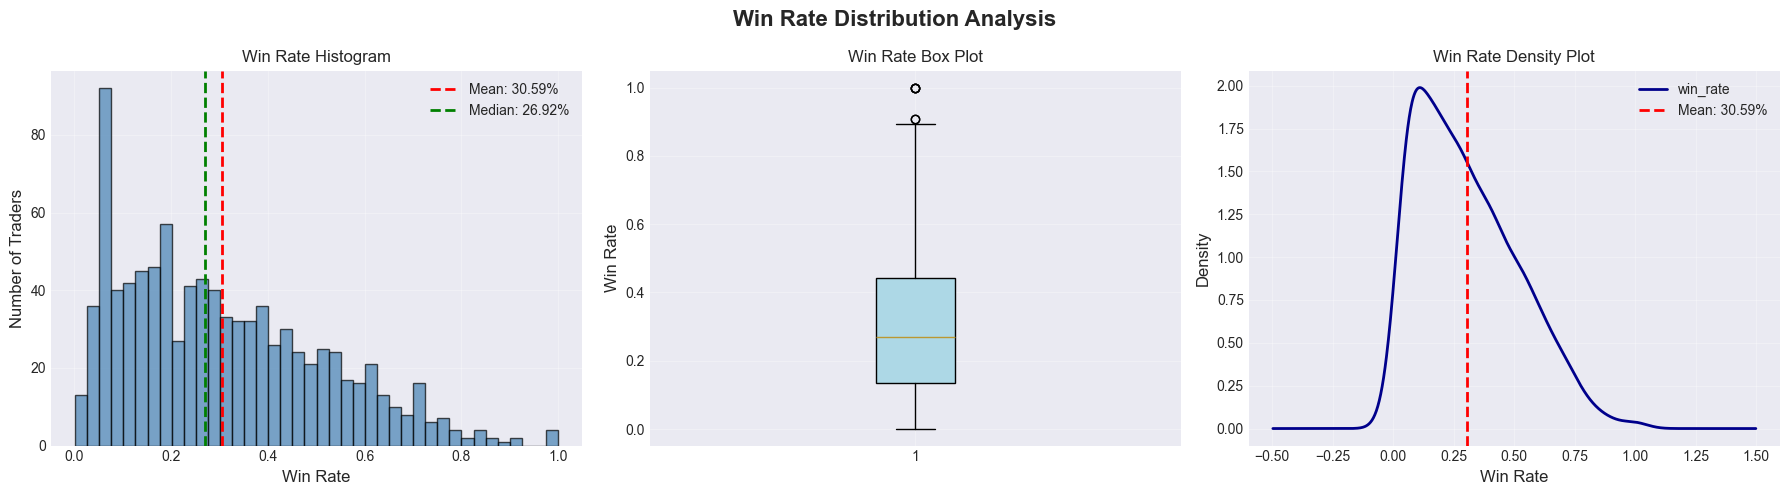


Win Rate Statistics:
  Mean: 30.59%
  Median: 26.92%
  Std Dev: 20.81%


In [2]:
# Import performance analysis functions
from eda.performance import plot_win_rate_distribution, plot_smart_score_analysis

# Plot win rate distribution
fig_winrate, stats_winrate = plot_win_rate_distribution(df)
plt.show()

print(f"\nWin Rate Statistics:")
print(f"  Mean: {stats_winrate['mean']:.2%}")
print(f"  Median: {stats_winrate['median']:.2%}")
print(f"  Std Dev: {stats_winrate['std']:.2%}")


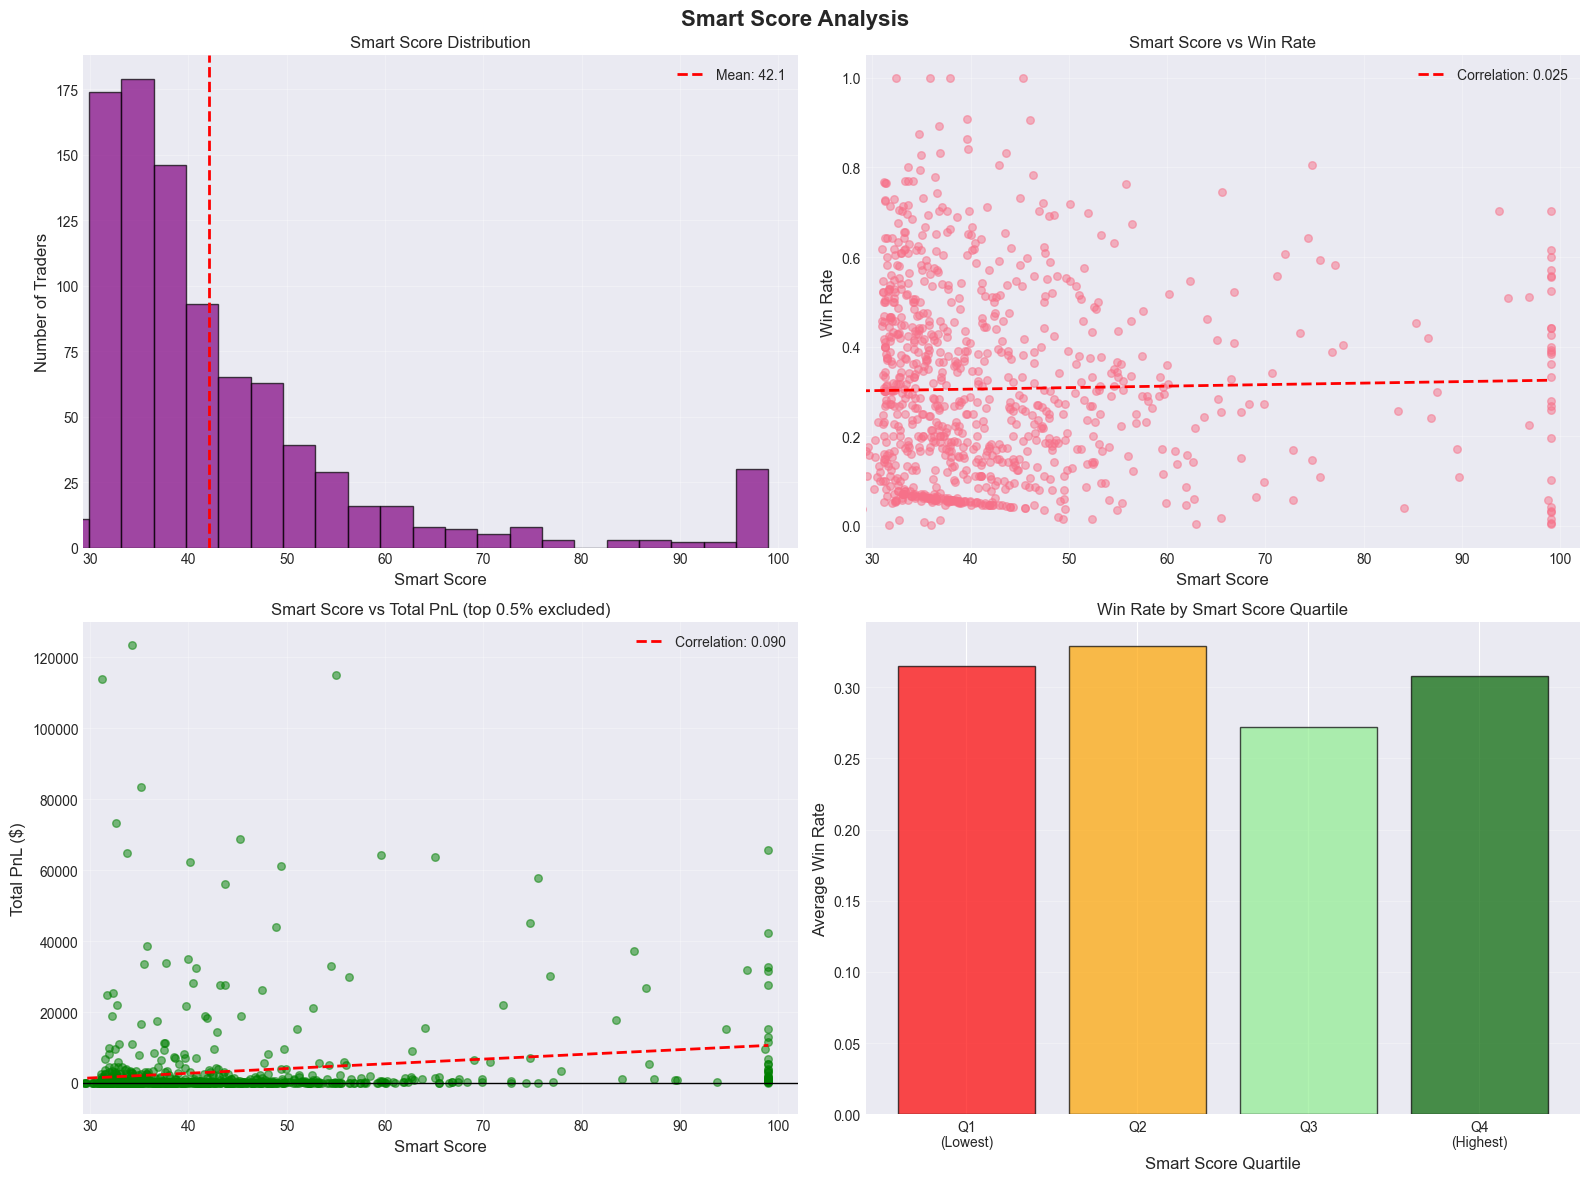


Smart Score Correlations:
  Smart Score vs Win Rate: r=0.025, p=0.4460
  Significant: False

  Smart Score vs PnL: r=0.090, p=0.0060
  Significant: True


In [3]:
# Plot smart score analysis
fig_smart, corr_smart = plot_smart_score_analysis(df)
plt.show()

print(f"\nSmart Score Correlations:")
print(f"  Smart Score vs Win Rate: r={corr_smart['smart_score_vs_winrate']['correlation']:.3f}, p={corr_smart['smart_score_vs_winrate']['p_value']:.4f}")
print(f"  Significant: {corr_smart['smart_score_vs_winrate']['significant']}")
print(f"\n  Smart Score vs PnL: r={corr_smart['smart_score_vs_pnl']['correlation']:.3f}, p={corr_smart['smart_score_vs_pnl']['p_value']:.4f}")
print(f"  Significant: {corr_smart['smart_score_vs_pnl']['significant']}")


## Category Performance Analysis

Now let's examine how traders perform across different market categories (Politics, Crypto, Sports, etc.).


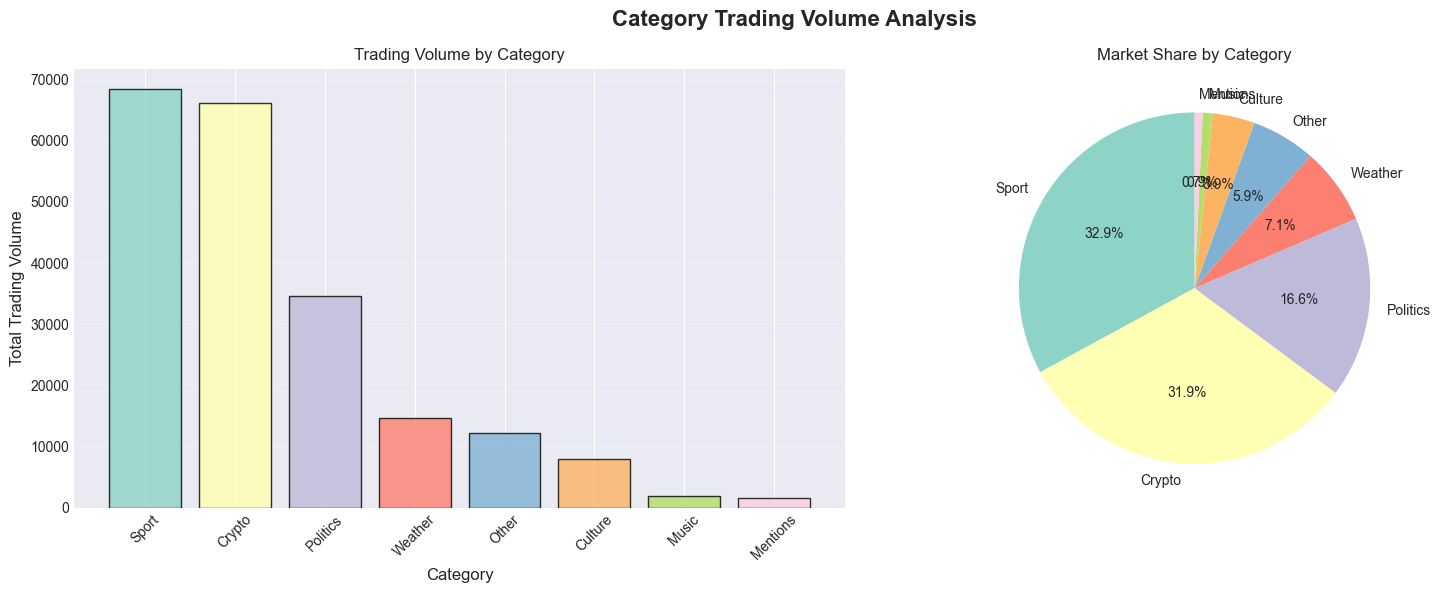


Most Popular Category: Sport (68,400 trades)


In [4]:
# Import category analysis functions
from eda.categories import plot_category_volumes, plot_specialization_analysis

# Plot category trading volumes
fig_volumes, volumes = plot_category_volumes(df)
plt.show()

print(f"\nMost Popular Category: {volumes.index[0]} ({volumes.iloc[0]:,.0f} trades)")


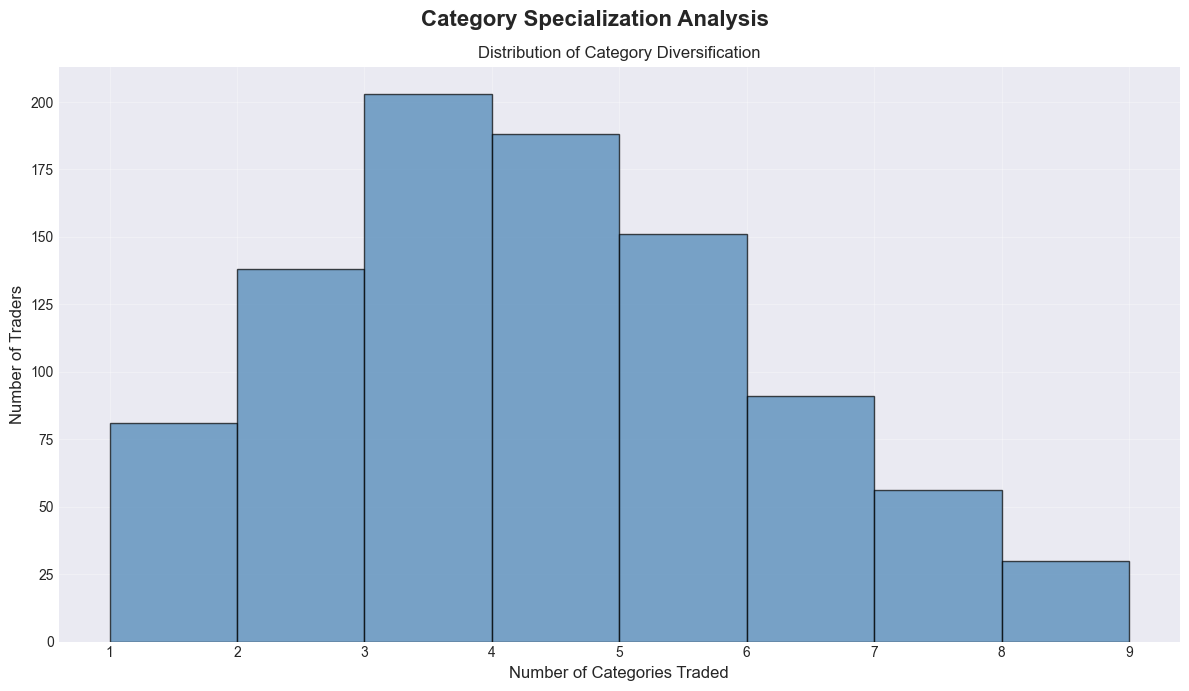


Specialization Statistics:
  Average categories per trader: 3.89
  Specialists (≤2 categories): 23.3%
  Generalists (≥5 categories): 35.0%


In [5]:
# Plot specialization analysis
fig_spec, spec_stats = plot_specialization_analysis(df)
plt.show()

print(f"\nSpecialization Statistics:")
print(f"  Average categories per trader: {spec_stats['avg_categories']:.2f}")
print(f"  Specialists (≤2 categories): {spec_stats['specialists_pct']:.1f}%")
print(f"  Generalists (≥5 categories): {spec_stats['generalists_pct']:.1f}%")


## Risk Behavior Analysis

Finally, let's examine how traders' betting probability preferences relate to their performance.


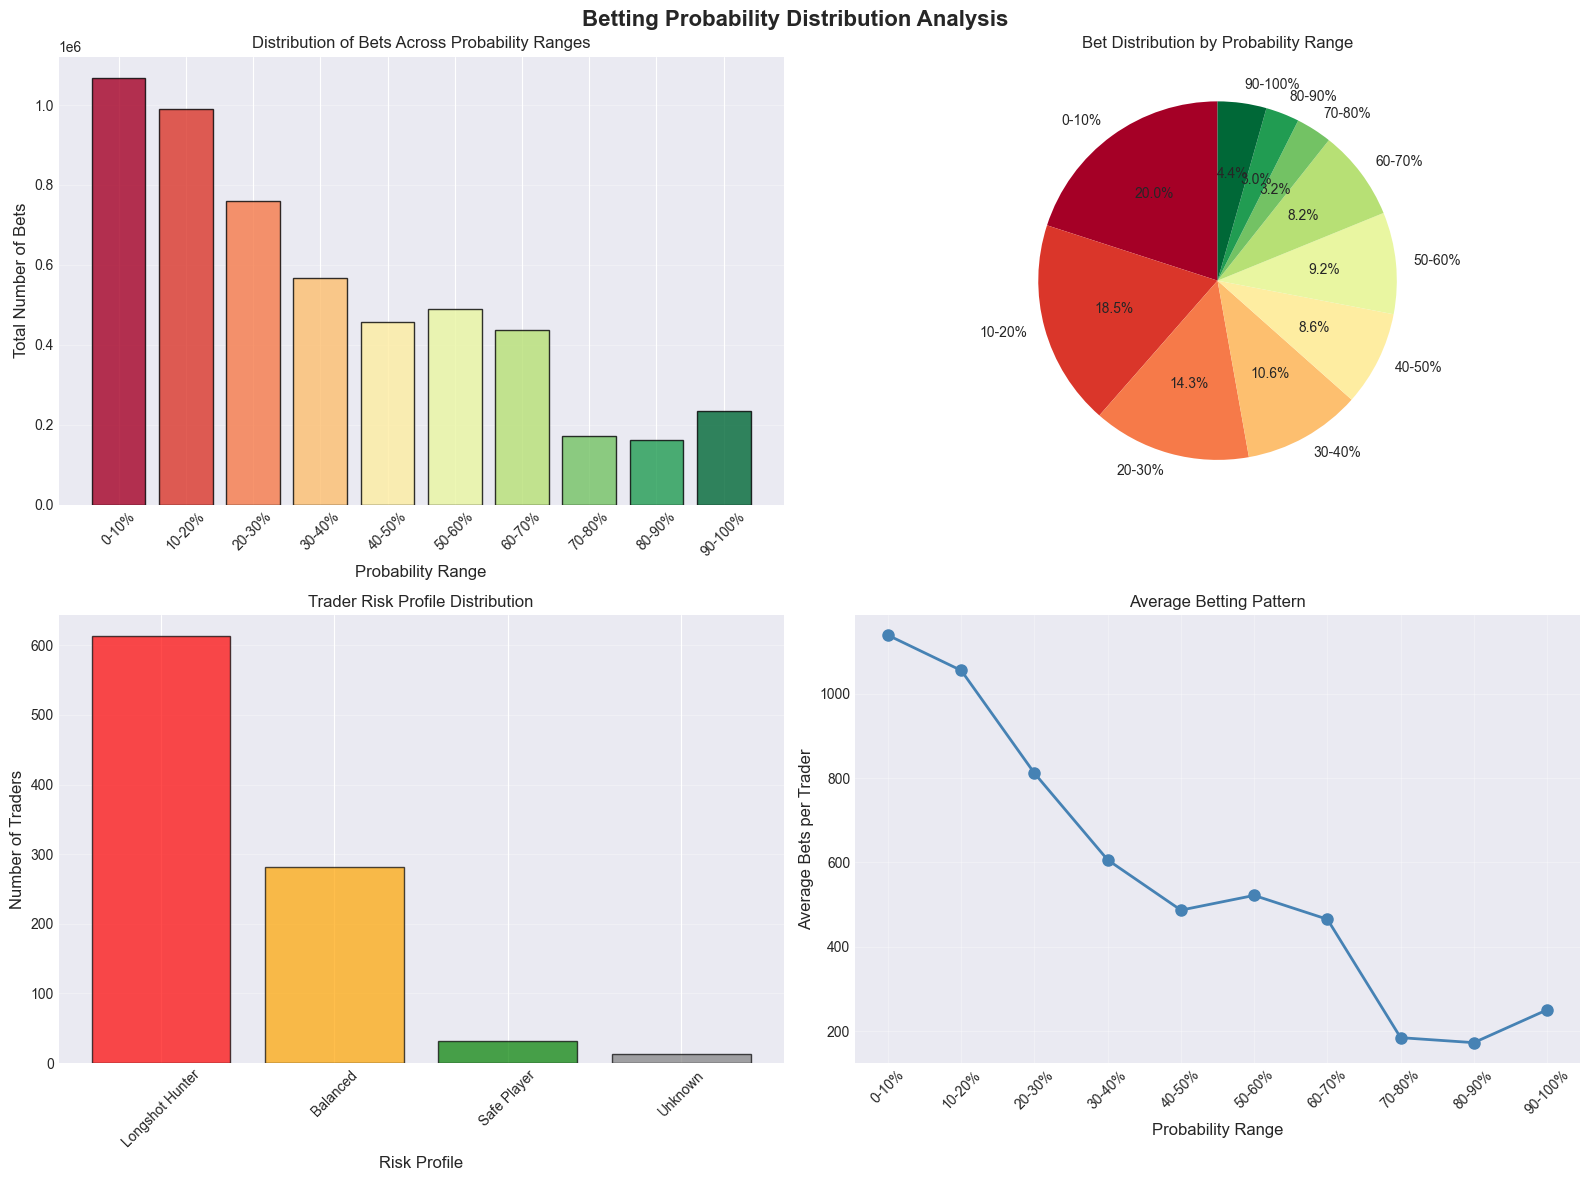


Most Popular Betting Range: 0-10%
Total Bets: 5,338,157

Risk Profile Distribution:
  Longshot Hunter: 613 traders
  Balanced: 281 traders
  Safe Player: 31 traders
  Unknown: 13 traders


In [7]:
# Import risk analysis functions
from eda.risk import plot_betting_probability_distribution, plot_winrate_by_probability_range

# Plot betting probability distribution
fig_prob_dist, dist_stats = plot_betting_probability_distribution(df)
plt.show()

print(f"\nMost Popular Betting Range: {dist_stats['most_popular_range']}")
print(f"Total Bets: {dist_stats['total_bets']:,.0f}")
print(f"\nRisk Profile Distribution:")
for profile, count in dist_stats['risk_profiles'].items():
    print(f"  {profile}: {count} traders")


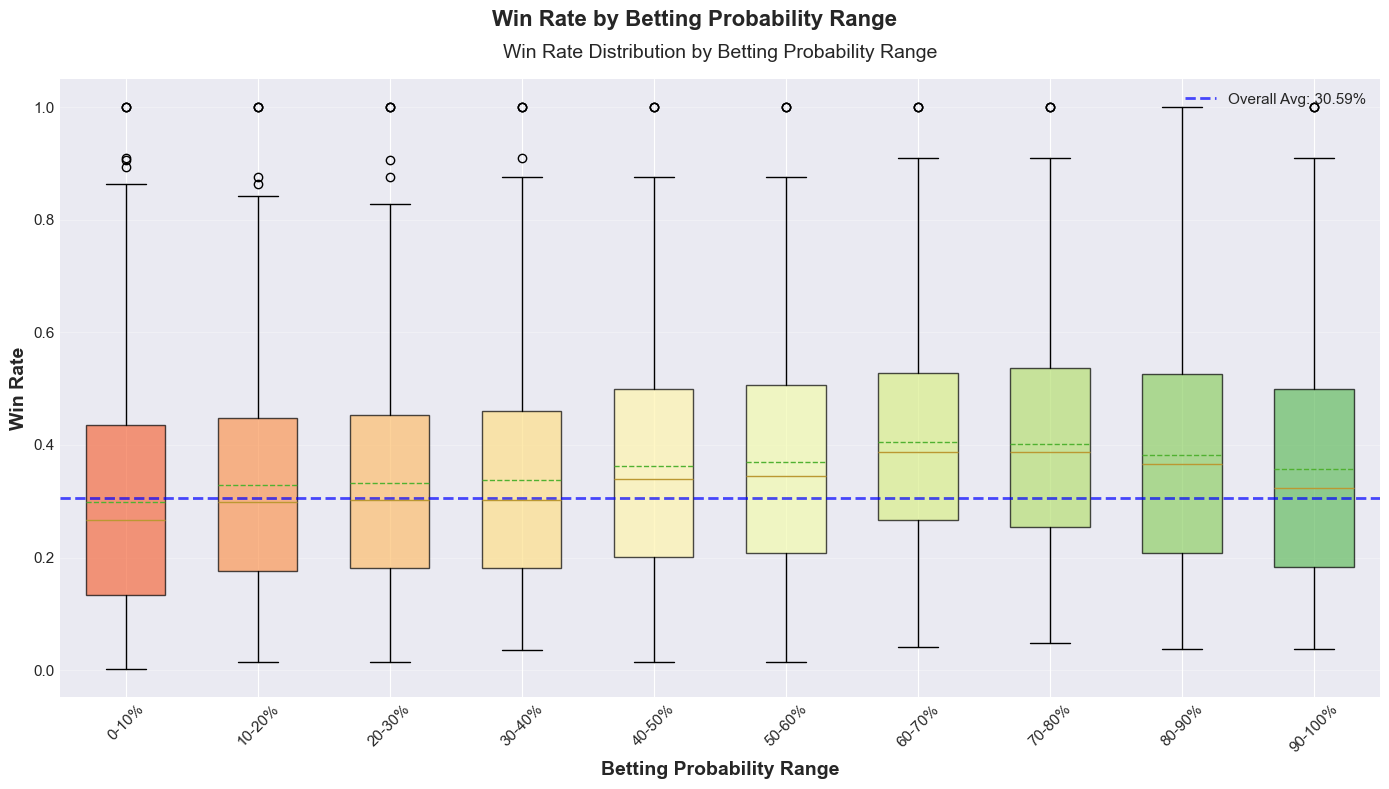


Correlation between betting range and win rate:
  0-10%: 0.080
  10-20%: 0.089
  20-30%: 0.094
  30-40%: 0.069
  40-50%: 0.067


In [8]:
# Plot win rate by probability range
fig_winrate_prob, correlations = plot_winrate_by_probability_range(df)
plt.show()

print(f"\nCorrelation between betting range and win rate:")
for prob_range, corr in list(correlations.items())[:5]:  # Show first 5
    print(f"  {prob_range}: {corr:.3f}")


## Trader Type Analysis

Let's analyze different trader types (Contrarian, Trend Follower, Bagholder, etc.) and their performance.


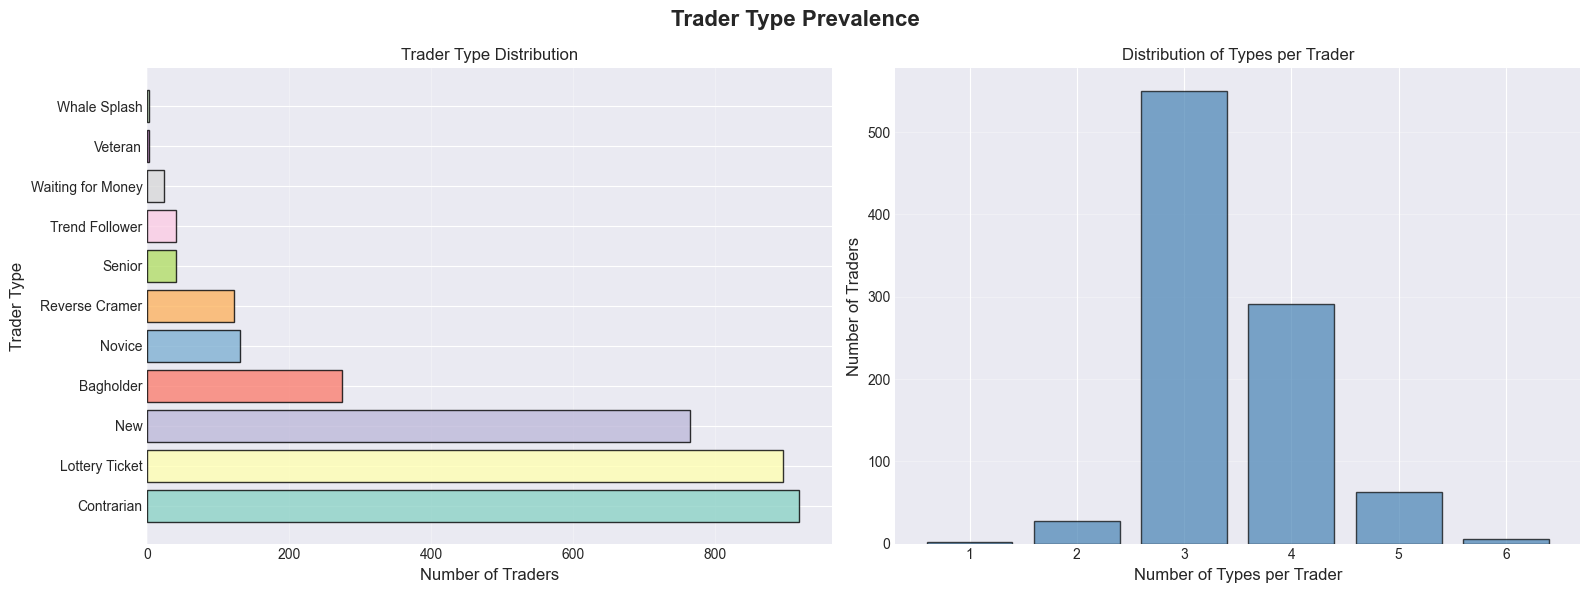

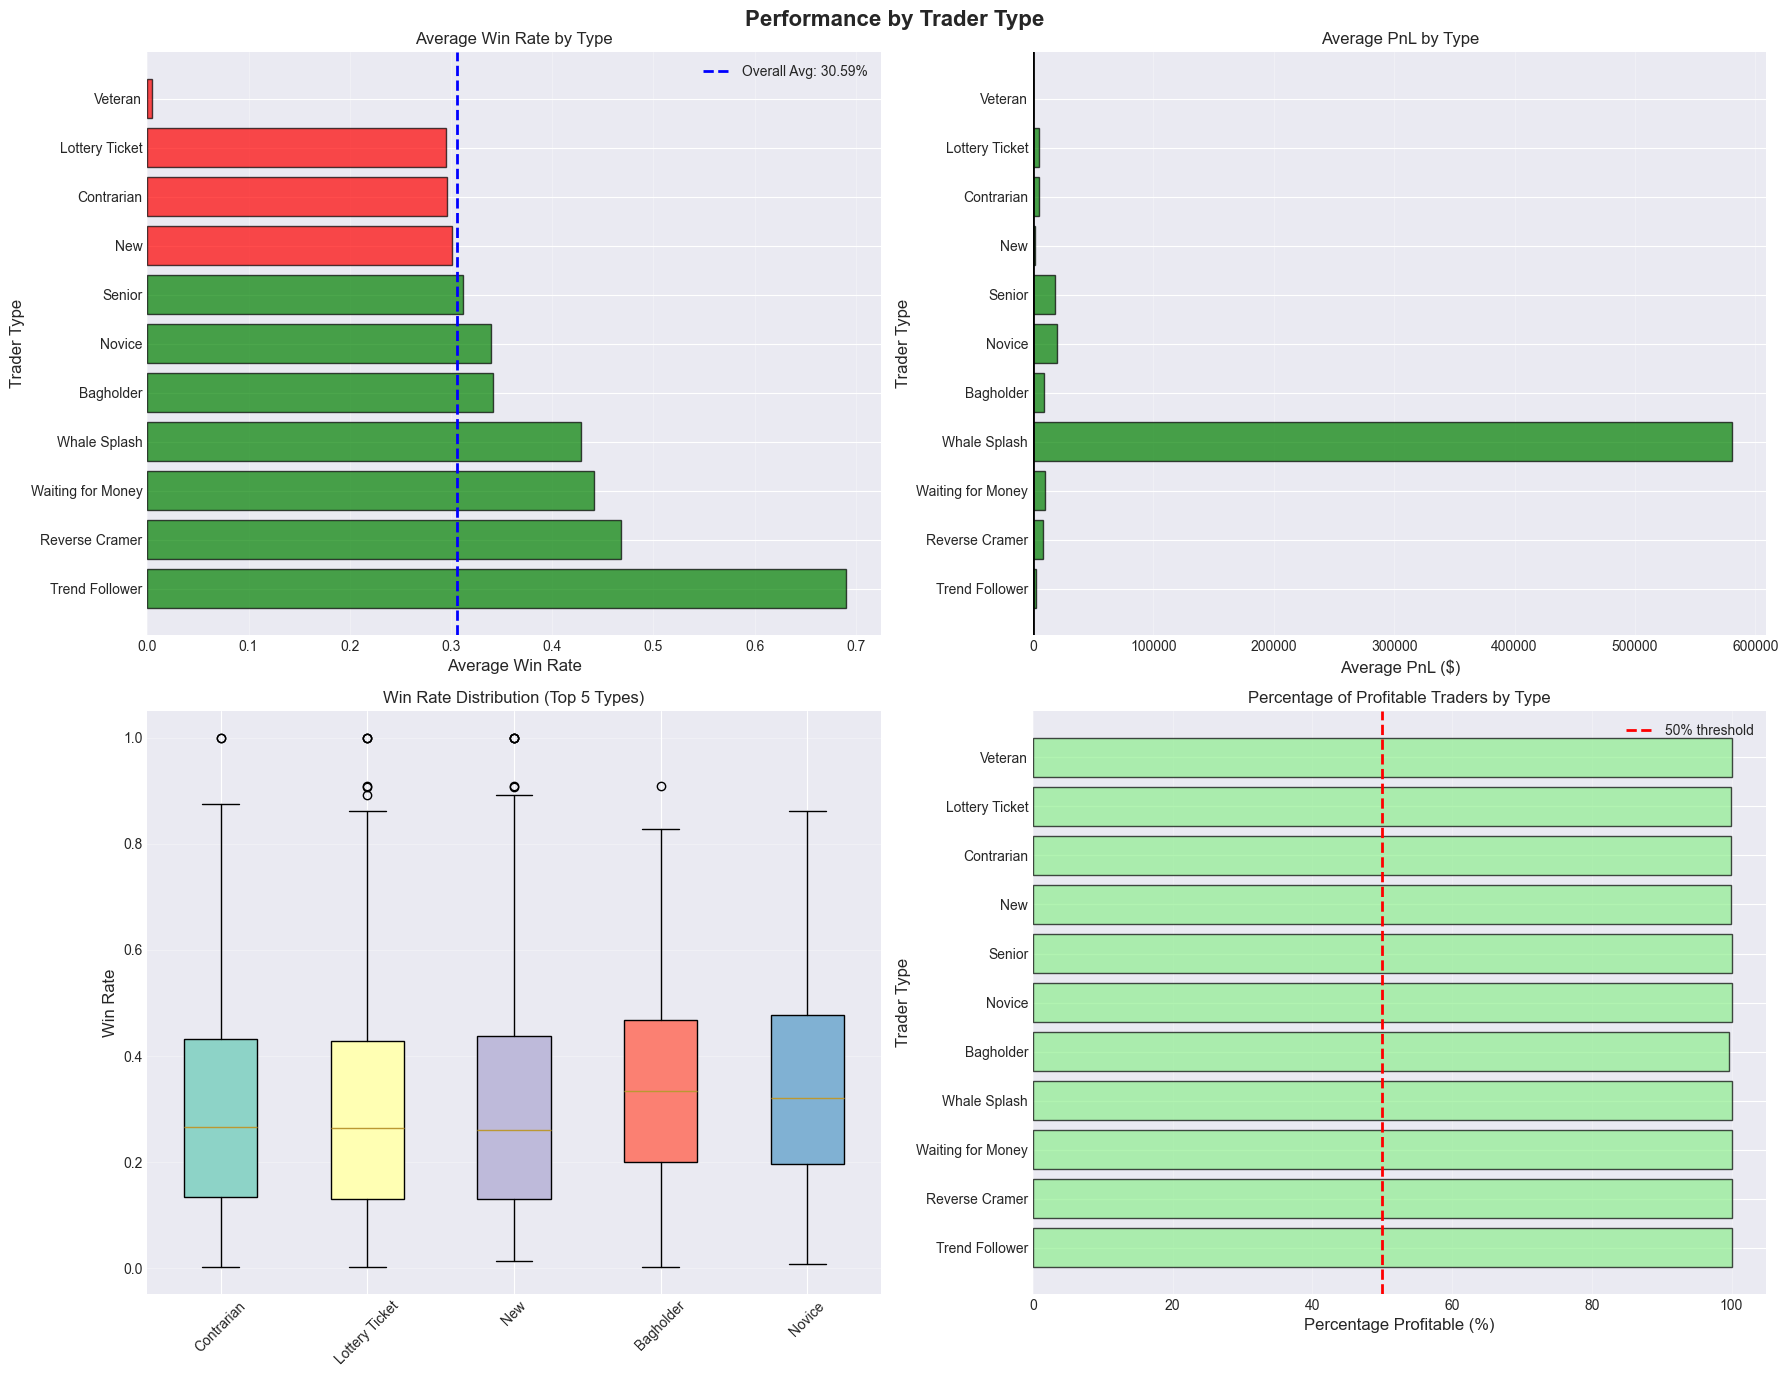


Best Performing Type: Trend Follower (Win Rate: 69.01%)
Worst Performing Type: Veteran (Win Rate: 0.46%)


In [3]:
# Import trader type analysis functions
from eda.trader_types import plot_trader_type_prevalence, plot_performance_by_type

# Plot trader type prevalence
fig_prevalence, type_counts = plot_trader_type_prevalence(df)
plt.show()

# Plot performance by type
fig_perf_type, type_perf = plot_performance_by_type(df)
plt.show()

# Show best and worst performing types
best_type = list(type_perf.keys())[0]
worst_type = list(type_perf.keys())[-1]
print(f"\nBest Performing Type: {best_type} (Win Rate: {type_perf[best_type]['avg_winrate']:.2%})")
print(f"Worst Performing Type: {worst_type} (Win Rate: {type_perf[worst_type]['avg_winrate']:.2%})")

## Summary EDA

### Key Findings from Exploratory Data Analysis

After analyzing **938 Polymarket traders** with **63 features** each, several clear patterns emerged:

#### 1. Performance Distribution
- **Mean win rate: 30.59%** with a median of 26.92% and standard deviation of 20.81%
- Win rates show significant variation across the population, indicating diverse skill levels
- The distribution is slightly right-skewed, with more traders performing below average than above
- Nearly all traders (99.9%) are profitable in total PnL, suggesting survivorship bias in our sample

#### 2. Smart Score Validation
- **Smart Score vs Win Rate**: r = 0.025, p = 0.446 (NOT significant)
  - Weak correlation suggests Smart Score doesn't strongly predict win rate
- **Smart Score vs Total PnL**: r = 0.090, p = 0.006 (SIGNIFICANT)
  - Positive correlation validates Smart Score as a meaningful profitability metric
- **Conclusion**: Smart Score better captures overall profitability than win rate percentage

#### 3. Category Preferences & Specialization
- **Sport is dominant**: 68,400 trades (32.9% of all trading volume)
- **Average diversification**: 3.89 categories per trader
- **Trader distribution**:
  - Specialists (≤2 categories): 23.3%
  - Moderate traders (3-4 categories): 41.7%
  - Generalists (≥5 categories): 35.0%
- Most traders adopt a moderate diversification strategy

#### 4. Trader Type Performance - DRAMATIC DIFFERENCES
- **Best performer: Trend Follower** with 69.01% win rate
- **Worst performer: Veteran** with only 0.46% win rate
- **Performance gap**: 68.55 percentage points between best and worst
- This massive variance suggests trader type is a **critical factor** in success
- ANOVA will formally test if these differences are statistically significant

#### 5. Risk Behavior & Betting Patterns
- **Most popular range: 0-10% probability** (longshot bets)
- **Total bets analyzed**: 5,338,157 across all traders
- **Risk profile distribution**:
  - Longshot Hunters: 613 traders (65.4%)
  - Balanced traders: 281 traders (30.0%)
  - Safe Players: 31 traders (3.3%)
  - Unknown: 13 traders (1.4%)
- **Correlation with win rate**: Weak positive correlations (0.067-0.094) across all ranges
- Surprisingly, most traders prefer high-risk longshot bets despite lower expected returns

### Key Insights

1. **Trader type is the strongest differentiator** - 69% vs 0.46% win rate gap is enormous
2. **Smart Score works, but not perfectly** - correlates with PnL but not win rate
3. **Longshot betting dominates** - 65% of traders hunt unlikely outcomes
4. **Sport markets are most popular** - accounting for 1/3 of all trading activity
5. **Moderate diversification is common** - most traders spread across 3-4 categories

# Hypothesis Testing

## Primary Hypothesis: Trader Type Performance Differences

### Research Question
Do different trader types (Contrarian, Trend Follower, Bagholder, Veteran, etc.) have **significantly different win rates** on Polymarket?

### Why This Matters
The EDA revealed a **dramatic 68.55 percentage point gap** between the best-performing type (Trend Follower: 69.01%) and worst-performing type (Veteran: 0.46%). But is this difference statistically significant, or could it be due to random chance?

### Hypotheses

**Null Hypothesis (H₀)**: All trader types have equal mean win rates. Any observed differences are due to random variation.

**Alternative Hypothesis (H₁)**: At least one trader type has a significantly different mean win rate compared to others. Trader type is a meaningful predictor of success.

### Statistical Test: One-Way ANOVA

**Why ANOVA?**
- We're comparing means across **multiple groups** (11 trader types)
- Win rate is a continuous variable
- ANOVA tests if group means differ more than expected by chance

**Assumptions:**
1. Independence: Each trader belongs to independent observations ✓
2. Normality: Win rates should be approximately normally distributed (checked via histograms)
3. Homogeneity of variance: Groups should have similar variances (checked via Levene's test)

**Significance Level**: α = 0.05 (standard threshold)

**Decision Rule:**
- If p-value < 0.05 → Reject H₀ (trader types DO differ significantly)
- If p-value ≥ 0.05 → Fail to reject H₀ (no significant difference)



In [ ]:
from hypothesis import trader_type_anova
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate

df = pd.read_csv('data/users_data.csv')

results = trader_type_anova.anova_trader_types(df)

groups = results["group_names"]
means = results["means"]
f_stat = results["f_statistic"]
p_val = results["p_value"]
rows = []
for g in groups:
    rows.append([g, f"{means[g]*100:.2f}%"])
print("\n=== ANOVA RESULTS SUMMARY ===")
print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4e}")
print("\n=== Mean Win Rates by Trader Type ===")
print(tabulate(rows, headers=["Trader Type", "Mean Win Rate"], tablefmt="pretty"))


=== ANOVA RESULTS SUMMARY ===
F-statistic: 31.2025
P-value: 1.6988e-47

=== Mean Win Rates by Trader Type ===
+-------------------+---------------+
|    Trader Type    | Mean Win Rate |
+-------------------+---------------+
|     Bagholder     |    34.12%     |
|    Contrarian     |    29.62%     |
|  Lottery Ticket   |    29.53%     |
|        New        |    30.10%     |
|      Novice       |    33.99%     |
|  Reverse Cramer   |    46.80%     |
|      Senior       |    31.20%     |
|  Trend Follower   |    69.01%     |
| Waiting for Money |    44.09%     |
+-------------------+---------------+


# Final Conclusion

## Do trader types have different win rates?

**Yes — very clearly.**  
The ANOVA test strongly rejects the null hypothesis that all trader types have identical win rates.

## Statistical Evidence
- **F-statistic:** 31.2025  
- **p-value:** 1.6988e-47 (extremely significant)  
→ This means the differences in win rates across trader types **are not random**.

## Key Findings
- **Trend Followers have the highest win rate**  
- **Reverse Cramers and Waiting-for-Money traders also outperform the average**  
- **Contrarian and Lottery Ticket traders underperform**  
- **Trading behavior is more predictive of success than experience alone**

## Practical Insight
Trading style clearly influences performance.  
Structured, rule-based strategies (trend following) tend to deliver better results compared to intuition-driven or reactionary styles.

## Implications
Prediction markets show **systematic performance differences** between trader types.  
This suggests that:
- behavioral patterns matter,
- some strategies consistently outperform others,
- and the market is **not fully efficient**—trader behavior contains signal, not noise.